<a href="https://colab.research.google.com/github/GrigoreGeorgeAlexandru/Blender-projects/blob/main/lab_4_apd_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiune = 100
Jacobi: 0.0580294132232666 secunde, nr. iteratii: 152, diferenta finala: 0.000966961446420875
rezultat:
[ 7.62946447e-03  1.01678908e-02 -3.27630088e-03 -4.92413593e-03
  1.97655484e-03 -3.76197625e-03  1.32269310e-02 -1.99222235e-03
  1.47696039e-02  4.04122833e-04  1.37193540e-02  1.40538326e-02
  1.30781852e-03  1.23367542e-02  1.08314761e-02  6.75787033e-03
  6.64028136e-03  9.56822660e-03  7.25824205e-03  1.66214894e-02
  1.36938314e-02  1.14690533e-02  3.49006138e-03  5.79299026e-03
  4.55695447e-03  3.01637070e-03 -2.70740078e-03  1.01372536e-02
 -4.19684394e-03  3.83622414e-03  9.75824666e-05 -2.93821982e-03
  1.37700607e-02  1.25193993e-02  2.70648308e-03  1.43513006e-02
  5.36068957e-03  5.88189847e-03 -4.21727409e-03  9.71427381e-03
 -2.58068925e-03  1.99670025e-04  6.01479156e-03 -3.83333496e-03
  8.10140756e-03  1.07925227e-02  8.77691311e-03  4.30897895e-03
  1.07079822e-02  1.32713363e-02  1.38045505e-02 -2.60244865e-03
  1.00569198e-02  5.03448352e-04 -

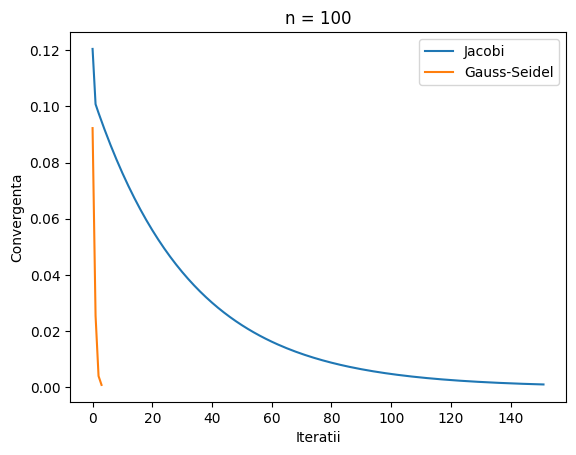

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Algoritmul Jacobi
def jacobi(A, b, max_diff=(2 ** -10), max_iterations=10000):
    n = len(b)
    x = np.zeros(n)
    x_new = np.zeros(n)
    diffs = []

    for _ in range(max_iterations):
        for i in range(n):
            x_new[i] = 1 / A[i, i] * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x[i + 1:]))

        diff = np.linalg.norm(x_new - x)
        diffs.append(diff)
        if diff < max_diff:
            break
        x = x_new.copy()

    return x, diffs, diff


# Algoritmul Gauss-Seidel
def gauss_seidel(A, b, max_diff=(2 ** -10), max_iterations=10000):
    n = len(b)
    x = np.zeros(n)
    diffs = []

    for _ in range(max_iterations):
        x_old = x.copy()
        for i in range(n):
            x[i] = 1 / A[i, i] * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_old[i + 1:]) )

        diff = np.linalg.norm(x - x_old)
        diffs.append(diff)
        if diff < max_diff:
            break

    return x, diffs, diff


# Functie ce genereaza o matrice diagonal dominanta
def create_matrix(dim):
    A = np.random.rand(dim, dim)
    np.fill_diagonal(A, np.sum(np.abs(A), axis=1) + 1)  # Diagonala dominanta
    return A


# Functie pentru compararea algoritmilor
def alg_testing(n):
    A = create_matrix(n)
    b = np.random.rand(n)

    print(f"Dimensiune = {n}")


    # Jacobi
    start_time = time.time()
    jacobi_res, jacobi_diffs, jacobi_final_diff = jacobi(A, b)
    jacobi_time = time.time() - start_time

    # Gauss-Seidel
    start_time = time.time()
    gauss_seidel_res, gauss_seidel_diffs, gauss_seidel_final_diff = gauss_seidel(A, b)
    gauss_seidel_time = time.time() - start_time

    # Afisarea rezultatelor
    print(f"Jacobi: {jacobi_time} secunde, nr. iteratii: {len(jacobi_diffs)}, diferenta finala: {jacobi_final_diff}\nrezultat:\n{jacobi_res}")
    print(f"Gauss-Seidel: {gauss_seidel_time} secunde, nr iteratii: {len(gauss_seidel_diffs)}, diferenta finala: {gauss_seidel_final_diff}\nrezultat\n{gauss_seidel_res}")
    plt.figure()
    plt.plot(jacobi_diffs, label='Jacobi')
    plt.plot(gauss_seidel_diffs, label='Gauss-Seidel')
    plt.xlabel('Iteratii')
    plt.ylabel('Convergenta')
    plt.title(f"n = {n}")
    plt.legend()
    plt.show()


def main():

        alg_testing(100)


if __name__ == "__main__":
    main()
